In [ ]:
pip install --upgrade pip
pip install yellowbrick

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import mixture
from scipy.stats import norm
import math

In [2]:
# to compute fractional power of a matix 
import numpy as np
import random as rd
from scipy.linalg import fractional_matrix_power
import statspy
A = np.array([[1, 2], [3, 4]])

fractional_matrix_power(A, -0.5)

# array([[ 0.10306396-1.24742804j,  0.15020820+0.5706074j ],
#        [ 0.22531231+0.8559111j ,  0.32837626-0.39151694j]])

array([[0.10306396-1.24742804j, 0.1502082 +0.5706074j ],
       [0.22531231+0.8559111j , 0.32837626-0.39151694j]])

In [3]:
norm.pdf(0, 0, 1)

0.3989422804014327

In [4]:
tab=pd.read_csv('irm_thorax.txt',sep=';',header=None);

tab=np.array(tab);
tab

array([[254, 255, 254, ..., 172, 187, 178],
       [255, 255, 255, ..., 177, 177, 177],
       [255, 255, 255, ..., 187, 172, 172],
       ...,
       [ 95, 105, 106, ..., 202, 199, 197],
       [ 95, 103, 106, ..., 195, 196, 194],
       [ 95, 102, 106, ..., 195, 200, 199]])

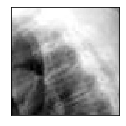

In [5]:
figure=plt.figure(figsize=(4,2));plt.imshow(tab, cmap='gray');
plt.xticks([], []);
plt.yticks([], []);
plt.show();

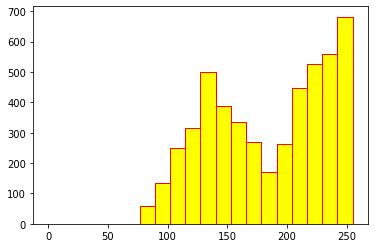

In [6]:
n=len(tab);X=tab.reshape(n*n);
plt.hist(X, range=(0, 255), bins=20, color='yellow', edgecolor='red');

ì observe that there seem to be two distributions on te histogram  

## Mixture of models and the EM algo

In [7]:
def Init_EM(x,k):
    proportion=[1/k]*k
    var=[1]*k
    means=np.random.choice(x, k)
    parameter={'proportions': proportion, 'moyenne':means, 'variance': var}
    return(parameter)


In [8]:
Init_EM(X,2)

{'proportions': [0.5, 0.5], 'moyenne': array([ 86, 153]), 'variance': [1, 1]}

In [9]:

def E_EM(X,param):
    K=len(param["moyenne"])
    nrow= len(X)
    tik=np.zeros( (nrow, K) )
    #c'est quoi tik : ws are the samples from the dataset, 
    #while columns represent every cluster, the elements of 
    #this matrix are interpreted as follows tik is the probability 
    #of sample i to be part of cluster k.
    for k in range(K):
        pik=param["proportions"][k]
        muk=param["moyenne"][k]
        sigk=param["variance"][k]
        for i in range(nrow):
            tik[i,k]=pik*norm.pdf(X[i],muk,sigk)
    a=np.sum(tik,axis=1)+0.00000001
    for i in range(nrow):
        for k in range(K):
            tik[i,k]=tik[i,k]/a[i]
    return(tik)

In [10]:
tik=E_EM(X,Init_EM(X,2))
len(tik[2])

2

In [11]:
def M_EM(x,param,tik):
    K=len(tik[1])
    muk=[0]*K
    sigk=[0]*K
    pi=[0]*K
    nrow= len(X)
    for k in range(K):
        muk[k]=sum(tik[:,k]*np.transpose(x))/sum(tik[:,k])
        sigk[k]=math.sqrt(sum(tik[:,k]*(x-muk[k])*np.transpose(x-muk[k])))
        for i in range(nrow):
            pi[k]=pi[k]+tik[i,k]
        pi[k]=pi[k]/nrow
    parameter={'proportions': pi, 'moyenne':muk, 'variance': sigk}
    return(parameter)

In [12]:
M_EM(X,Init_EM(X,2),E_EM(X,Init_EM(X,2)))

{'proportions': [0.04989637329355567, 0.09258699829800056],
 'moyenne': [170.8833243856826, 135.88254724853618],
 'variance': [52.8180436253988, 69.90373535925423]}

In [13]:
def EM(x,k):
    param=Init_EM(x,k)
    tik=E_EM(x , param)
    paramnew=M_EM(x,param,tik)
    while((abs(sum(param['proportions'])-sum(paramnew['proportions']))>0.001) or (abs(sum(param['moyenne'])-sum(paramnew['moyenne']))>0.001) or(abs(sum(param['variance'])-sum(paramnew['variance']))>0.001) ):
        param=paramnew
        paramnew=M_EM(x,param,tik)
    return(paramnew)

In [14]:
EM(X,2)

{'proportions': [0.09728064885395153, 0.09258699829800056],
 'moyenne': [248.2470506468683, 135.88254724853618],
 'variance': [70.0860550047309, 69.90373535925423]}

In [15]:
from sklearn import mixture
X2=X.reshape(-1, 1)
modgmm=mixture.GaussianMixture(n_components=2, covariance_type='full');
fitgmm=modgmm.fit(X2);

predX=fitgmm.fit_predict(X2);
imgGMMK2=predX.reshape(n,n);
fitgmm.weights_





#plt.hist(imgGMMK2, range=(0, 3), bins=20, edgecolor='red');

array([0.51325, 0.48675])

In [16]:
fitgmm.means_
fitgmm.covariances_
fitgmm.weights_

array([[227.54446705],
       [139.24708055]])

In [17]:
fitgmm.covariances_

array([[[371.3110405 ]],

       [[686.48679279]]])

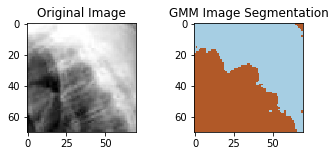

In [18]:
figure=plt.figure(figsize=(5.5,2));
plt.xticks([], []);
plt.yticks([], []);
ax=plt.subplot(1,2, 1);
ax.imshow(tab, cmap='gray');
ax.set_title('Original Image')
ax=plt.subplot(1,2, 2)
ax.imshow(imgGMMK2, cmap='Paired')
ax.set_title('GMM Image Segmentation')
plt.show();

In [19]:
X

array([254, 255, 254, ..., 195, 200, 199])

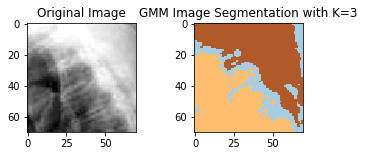

In [20]:
from sklearn import mixture
X2=X.reshape(-1, 1)# pour l'avoir en vectuer colonne
modgmm=mixture.GaussianMixture(n_components=3, covariance_type='full');
fitgmm=modgmm.fit(X2);

predX=fitgmm.fit_predict(X2);
imgGMMK3=predX.reshape(n,n);
figure=plt.figure(figsize=(5.5,2));
plt.xticks([], []);
plt.yticks([], []);
ax=plt.subplot(1,2, 1);
ax.imshow(tab, cmap='gray');
ax.set_title('Original Image')
ax=plt.subplot(1,2, 2)
ax.imshow(imgGMMK3, cmap='Paired')
ax.set_title('GMM Image Segmentation with K=3')
plt.show();

In [21]:
fitgmm.weights_


array([0.21017953, 0.37783362, 0.41198685])

In [22]:
fitgmm.means_


array([[185.69965931],
       [130.79355994],
       [233.30172561]])

In [23]:
fitgmm.covariances_

array([[[579.61762919]],

       [[477.69284694]],

       [[239.91814456]]])

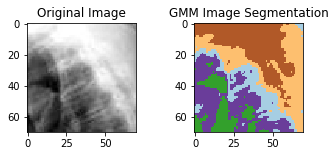

In [24]:
from sklearn import mixture
X2=X.reshape(-1, 1)# pour l'avoir en vectuer colonne
modgmm=mixture.GaussianMixture(n_components=5, covariance_type='full');
fitgmm=modgmm.fit(X2);

predX=fitgmm.fit_predict(X2);
imgGMMK5=predX.reshape(n,n);
figure=plt.figure(figsize=(5.5,2));
plt.xticks([], []);
plt.yticks([], []);
ax=plt.subplot(1,2, 1);
ax.imshow(tab, cmap='gray');
ax.set_title('Original Image')
ax=plt.subplot(1,2, 2)
ax.imshow(imgGMMK5, cmap='Paired')
ax.set_title('GMM Image Segmentation')
plt.show();

In [25]:
fitgmm.weights_


array([0.14602304, 0.11427024, 0.24688241, 0.22907223, 0.26375208])

In [26]:
fitgmm.means_


array([[168.42249408],
       [105.58218349],
       [212.8021437 ],
       [137.30163086],
       [242.34179116]])

In [27]:

fitgmm.covariances_

array([[[161.0407033 ]],

       [[154.95019613]],

       [[153.99214509]],

       [[122.25569669]],

       [[ 95.97289463]]])

In [28]:
from sklearn.cluster import KMeans
modkmeans=KMeans(n_clusters=2, random_state=0)
fitkmeans=modkmeans.fit(X2)

In [29]:
fitkmeans.cluster_centers_

array([[226.36801836],
       [136.76552931]])

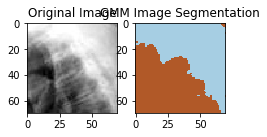

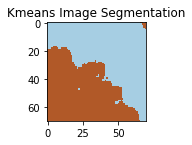

In [30]:

predX=fitkmeans.fit_predict(X2);
imgkmeansK2=predX.reshape(n,n);
figure=plt.figure(figsize=(5.5,3));
plt.xticks([], []);
plt.yticks([], []);
ax=plt.subplot(1,3, 1);
ax.imshow(tab, cmap='gray');
ax.set_title('Original Image')
ax=plt.subplot(1,3, 2)
ax.imshow(imgGMMK2, cmap='Paired')
ax.set_title('GMM Image Segmentation')
plt.show();
ax=plt.subplot(1,3, 3)
ax.imshow(imgkmeansK2, cmap='Paired')
ax.set_title('Kmeans Image Segmentation')
plt.show();

# spectral clustering

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import pandas as pd
from scipy.spatial import distance_matrix
import math

Text(0.5, 0, 'x2')

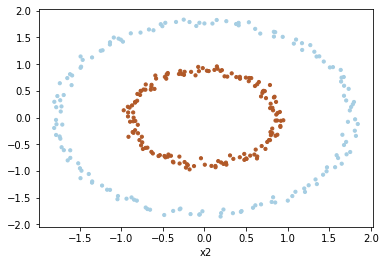

In [32]:
nsub=150;
my2circles=datasets.make_circles(n_samples=2*nsub, factor=.5, noise=.025)
X,y=my2circles;
X=StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], s=10,c=y, cmap='Paired')
plt.xlabel("x1");plt.xlabel("x2")

In [33]:
len(my2circles[1])

300

In [34]:
gaussian=np.random.multivariate_normal([0,0], [[0.001,0],[0,0.001]], 150)

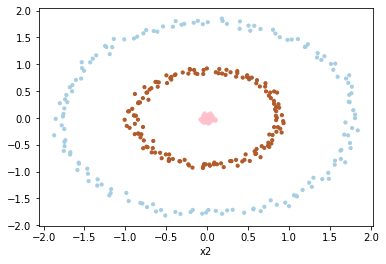

In [35]:
nsub=150;
my2circles=datasets.make_circles(n_samples=2*nsub, factor=.5, noise=.025)
X,y=my2circles;
X=StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], s=10,c=y, cmap='Paired')
plt.xlabel("x1");plt.xlabel("x2")
plt.scatter(gaussian[:, 0], gaussian[:, 1], s=10,color="pink")

In [36]:
X=np.concatenate((X,gaussian),axis=0)

In [37]:
len(X[:, 0])

450

In [38]:
df=pd.DataFrame(X);
Z=distance_matrix(df.values, df.values)

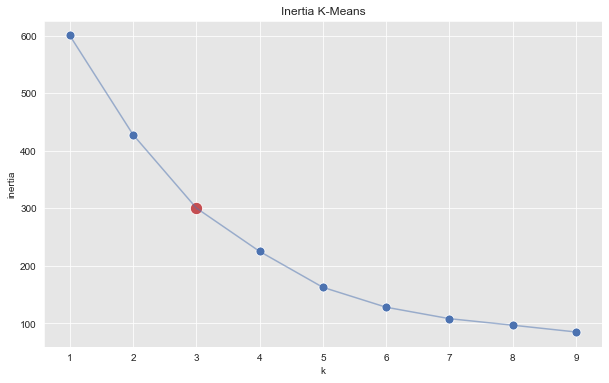

In [39]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
inertias = []

k_candidates = range(1, 10)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(df)
    inertias.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], color=sns_c[3], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k');

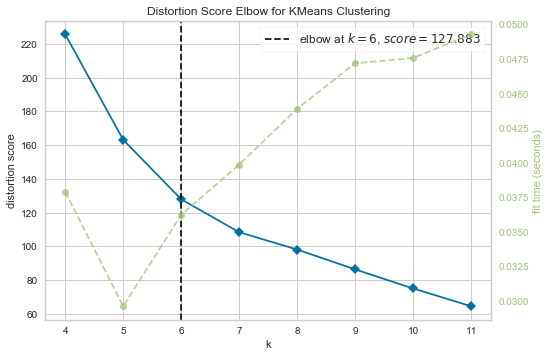

In [40]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
list(df.columns)

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(x=0, y=1, hue='cluster', data=df, ax=ax)
ax.set(title='Radius Feature (K-Means)');

In [ ]:
k_means = KMeans(random_state=25, n_clusters=3)
k_means.fit(df)
cluster = k_means.predict(df)

cluster = ['k-means_c_' + str(c) for c in cluster]

fig, ax = plt.subplots()
sns.scatterplot(x=0, y=1, data=df.assign(cluster = cluster), hue='cluster', ax=ax)
ax.set(title='K-Means Clustering');

In [ ]:
sigma=0.1
W=Z
for i in range(Z.shape[0]):
    for j in range (Z.shape[1]):
        W[i,j]=math.exp((-Z[i,j]**2)/(2*sigma**2))


In [ ]:
D=np.diag([1]*Z.shape[0])
D

In [ ]:
sum(W[0,:])

In [ ]:
for i in range(Z.shape[0]):
        D[i,i]=sum(W[i,:])

In [ ]:
I=np.diag([1]*Z.shape[0])
L=I-np.dot(np.dot(fractional_matrix_power(D, -0.5),W),fractional_matrix_power(D, -0.5))

In [ ]:
# L denotes the laplacian matrix, as previously defined
U, E, V=np.linalg.svd(L, full_matrices=True)

In [ ]:
len(V)

In [ ]:
V.shape

In [ ]:
np.diag(E)

In [ ]:
E

In [ ]:
K=3 # les vecteurs sont dans 
#l'ordre decroissant du plus grand au plus petit 
#donc je prend les 3 dernier vecteur

U1=U[:,449]
U2=U[:,448]
U3=U[:,447]

In [ ]:
L-np.dot(np.dot(U,np.diag(E)),V) #test pour voir que L= U*E*V

In [ ]:
len(U1)
for i in range(len(U1)):
    a=math.sqrt(U1[i]**2+U2[i]**2+U3[i]**2)
    U1[i]=U1[i]/a
    U2[i]=U2[i]/a
    U3[i]=U3[i]/a

In [ ]:
X=range(0,450)
x1=range(0,150)
x2=range(150,300)
x3=range(300,450)
c1 = ['blue' if x in x1  else  'green' if x in x2 else 'red' for x in X]

plt.scatter(X, U1, c=c1)


In [ ]:

# création de la fenêtre graphique 1

plt.figure(1,figsize=(10,4))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                          top = 0.9, wspace = 0.5, hspace = 0)

# division de la fenêtre graphique en 1 ligne, 3 colonnes,
# graphique en position 1
# puis caractéristiques de ce graphique

plt.subplot(1,3,1)
plt.scatter(X, U1, c=c1)
plt.title('eigen vector U1')
plt.grid()



# division de la fenêtre graphique en 1 ligne, 3 colonnes,
# graphique en position 2
# puis caractéristiques de ce graphique

plt.subplot(1,3,2)
plt.scatter(X, U2, c=c1)
plt.title('eigen vector U2')
plt.grid()


# division de la fenêtre graphique en 1 ligne, 3 colonnes,
# graphique en position 3
# puis caractéristiques de ce graphique

plt.subplot(1,3,3)

plt.scatter(X, U3, c=c1)
plt.title('eigen vector U3')
plt.grid()


plt.show()


In [ ]:
U=np.transpose(np.array([U1,U2,U3]))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(U, ax=ax, cmap='viridis_r')
ax.set(title='Eigenvectors Generating the Kernel of the Graph Laplacian');

In [ ]:
def run_k_means(df, n_clusters):
    """K-means clustering."""
    k_means = KMeans(random_state=25, n_clusters=n_clusters)
    k_means.fit(df)
    cluster = k_means.predict(df)
    return cluster

cluster = run_k_means(U, n_clusters=3)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    xs=U1, 
    ys=U2, 
    zs=U3,
    c=[{0: sns_c[0], 1: sns_c[1], 2: sns_c[2]}.get(c) for c in cluster]
)
ax.set_title('Small Eigenvectors Clusters', x=0.2);

In [ ]:
df['cluster'] = ['c_' + str(c) for c in cluster]

fig, ax = plt.subplots()
sns.scatterplot(x=0, y=1, data=df, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering');

In [ ]:
from sklearn.cluster import SpectralClustering
spec_cl = SpectralClustering(
    n_clusters=3, 
    random_state=42, 
    n_neighbors=8, 
    affinity='nearest_neighbors'
)

df['cluster'] = spec_cl.fit_predict(df[[0, 1]])
df['cluster'] = ['c_' + str(c) for c in df['cluster']]

fig, ax = plt.subplots()
sns.scatterplot(x=0, y=1, data=df, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering - Scikit Learn');

In [ ]:

df = df.assign(r2 = lambda x: np.power(x[0], 2) + np.power(x[1], 2))


In [ ]:
k_means = KMeans(random_state=25, n_clusters=3)
k_means.fit(df[['r2']])
cluster = k_means.predict(df[['r2']])

data_df = df.assign(cluster = ['k-means_c_' + str(c) for c in cluster])

fig, ax = plt.subplots()
sns.scatterplot(x='r2', y='r2', hue='cluster', data=df, ax=ax)
ax.set(title='Radius Feature (K-Means)');

In [ ]:
plt.scatter(U[:, 0], U[:, 1], s=10)
plt.xlabel("x1");plt.xlabel("x2")
#plt.scatter(U, gaussian[:, 1], s=10,color="pink")


In [ ]:
plt.scatter(U[:,0],U[:,2])

In [ ]:
from sklearn.cluster import KMeans
modkmeans=KMeans(n_clusters=3, random_state=0)
fitkmeans=modkmeans.fit(U)

In [ ]:
y_km=fitkmeans.fit_predict(U);
plt.plot(predX[:,1],predX[:,0] )


In [ ]:
fitkmeans.cluster_centers_

In [ ]:
# plot the 3 clusters
plt.scatter(
    U[y_km == 0, 0], U[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    U[y_km == 1, 0], U[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    U[y_km == 2, 0], U[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    fitkmeans.cluster_centers_[:, 0], fitkmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#effect of sigma 

In [ ]:
sigma=0.5
W=Z
for i in range(Z.shape[0]):
    for j in range (Z.shape[1]):
        W[i,j]=math.exp((-Z[i,j]**2)/(2*sigma**2))



In [42]:
#hierarchical clustering
n=len(tab);X=tab.reshape(n*n);
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
modHAC=AgglomerativeClustering(n_clusters=2).fit(tab)

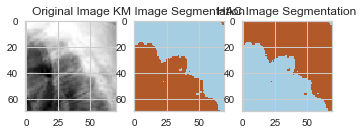

In [47]:
predX=modHAC.fit_predict(X2);
imghac=predX.reshape(n,n);
figure=plt.figure(figsize=(5.5,2));
plt.xticks([], []);
plt.yticks([], []);
ax=plt.subplot(1,3, 1);
ax.imshow(tab, cmap='gray');
ax.set_title('Original Image')
ax=plt.subplot(1,3, 2)
ax.imshow(imgkmeansK2, cmap='Paired')
ax.set_title('KM Image Segmentation')
ax=plt.subplot(1,3, 3)
ax.imshow(imghac, cmap='Paired')
ax.set_title('HAC Image Segmentation')
plt.show();